In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"loan.csv")
df.head()

,Cutomer id,Cards,Debit card,Insurance,Age,Cibil Score,Loan offer
0,5,0.0,1.0,0.0,50.0,34.940,0
1,3,1.0,0.0,0.0,18.0,0.891,1
2,66,0.0,1.0,0.0,5.0,0.330,1
3,70,0.0,1.0,1.0,31.0,0.037,0
4,96,0.0,1.0,0.0,30.0,0.038,1


In [3]:
df.drop(["Cutomer id"],inplace=True,axis=1)

<Axes: >

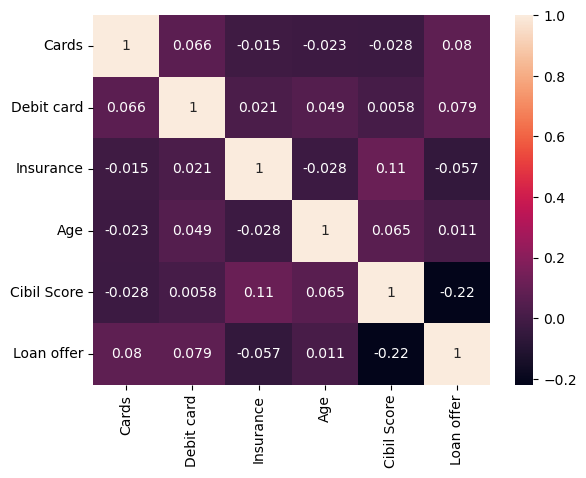

In [4]:
sns.heatmap(df.corr(),annot=True)

In [5]:
df.shape

(1340, 6)

In [6]:
df.isnull().sum()

Cards           12
Debit card      41
Insurance       48
Age            189
Cibil Score      0
Loan offer       0
dtype: int64

In [7]:
null_percent = df.isnull().sum()/len(df)
null_percent = null_percent[null_percent !=0] * 100
null_percent

Cards          0.895522
Debit card     3.059701
Insurance      3.582090
Age           14.104478
dtype: float64

In [8]:
df = df.dropna(subset = ['Cards'])

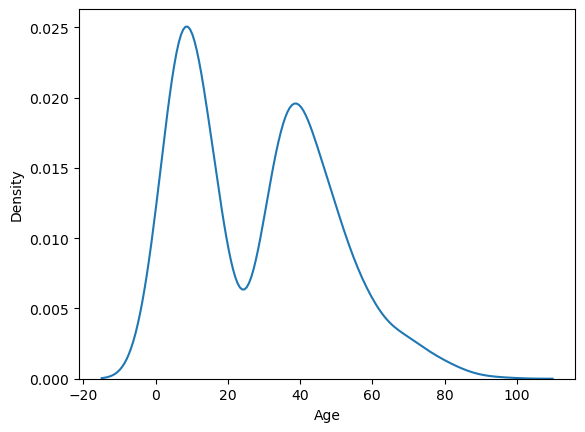

In [9]:
sns.kdeplot(df['Age'])
plt.show()

In [10]:
df['Age'].skew()

0.4100420361599179

In [11]:
print(df['Age'].mean())
print(df['Age'].median())

28.441433566433567
30.0


In [12]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [13]:
df['Insurance'].fillna(method='ffill',inplace=True)
df['Debit card'].fillna(method='ffill',inplace=True)

In [53]:
x = df.iloc[:,0:5]
y = df.iloc[:,-1]

In [54]:
classifier = LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [55]:
y_pred = classifier.predict(x)
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [56]:
y_pred_df= pd.DataFrame({'actual': y,
                         'predicted_prob': y_pred})

In [57]:
y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,1
4,1,1
...,...,...
1335,1,1
1336,0,0
1337,1,1
1338,0,0


In [58]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)

[[430 247]
 [146 505]]


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       677
           1       0.67      0.78      0.72       651

    accuracy                           0.70      1328
   macro avg       0.71      0.71      0.70      1328
weighted avg       0.71      0.70      0.70      1328



In [60]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y,y_pred)
score

0.704066265060241

Text(0, 0.5, 'True Positive Rate')

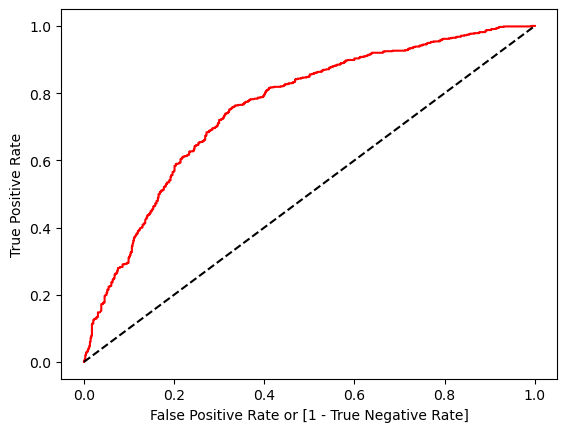

In [61]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (x)[:,1])

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')